In [1]:
import os
import tarfile
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
# retrieving the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urlretrieve(housing_url, tgz_path)
    
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Returning a Pandas dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


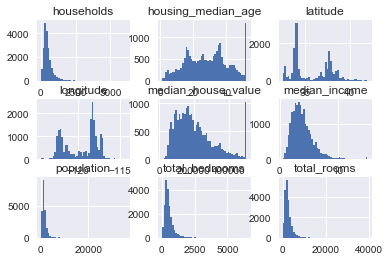

In [9]:
housing.hist(bins=50);

# Separating the Data
Once we have the data, it is best to separate it between training and test set

In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np

In [11]:
# A first attemp
train_set1, test_set1 = train_test_split(housing, test_size=0.2, random_state=42)

The histogram of data seems to be right-skewed. Since the data is not large enough, the segregation may not be unbiased

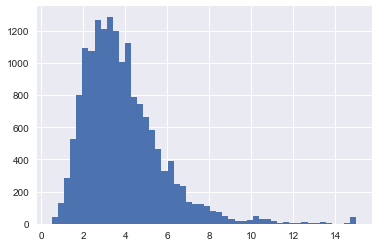

In [12]:
train_set1.median_income.hist(bins=50);

In [13]:
# A second attempt
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [14]:
# Initializing the Stratisfies Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = [ix for ix in split.split(housing, housing["income_cat"])][0]
train_set2 = housing.loc[train_index]
test_set2 = housing.loc[test_index]

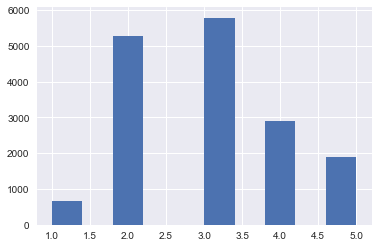

In [15]:
train_set2.income_cat.hist();

# Exploring the data

In [16]:
# copying the data to fir the model from
housing = train_set2.copy()

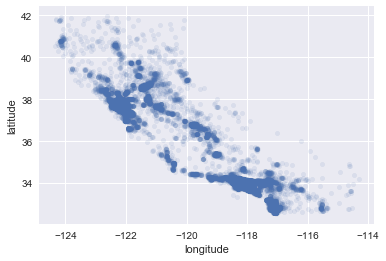

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

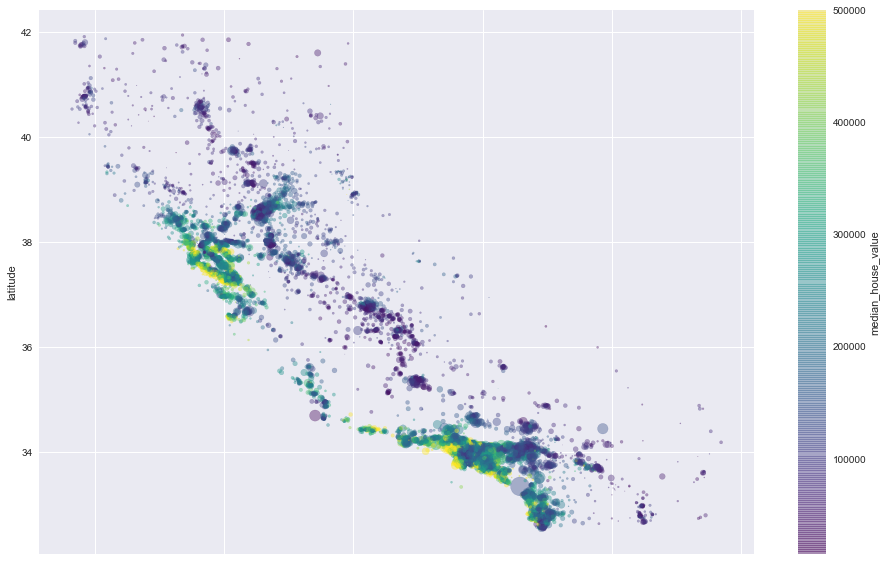

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s = housing["population"]/100, c="median_house_value",
             cmap=plt.get_cmap("viridis"), colorbar=True,
            figsize=(16,10));

## Plotting Correlations

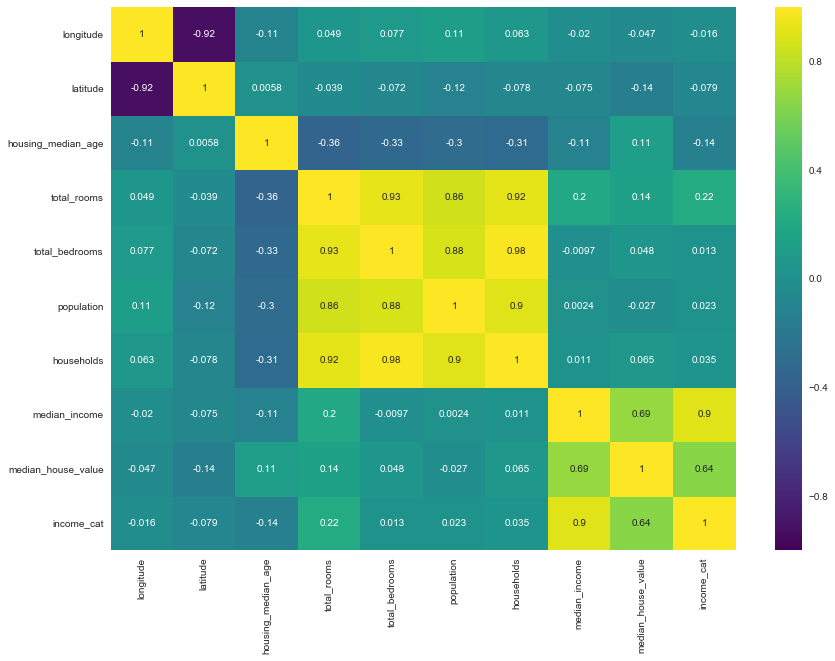

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(housing.corr(), cmap=plt.get_cmap("viridis"), annot=True);

In [20]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

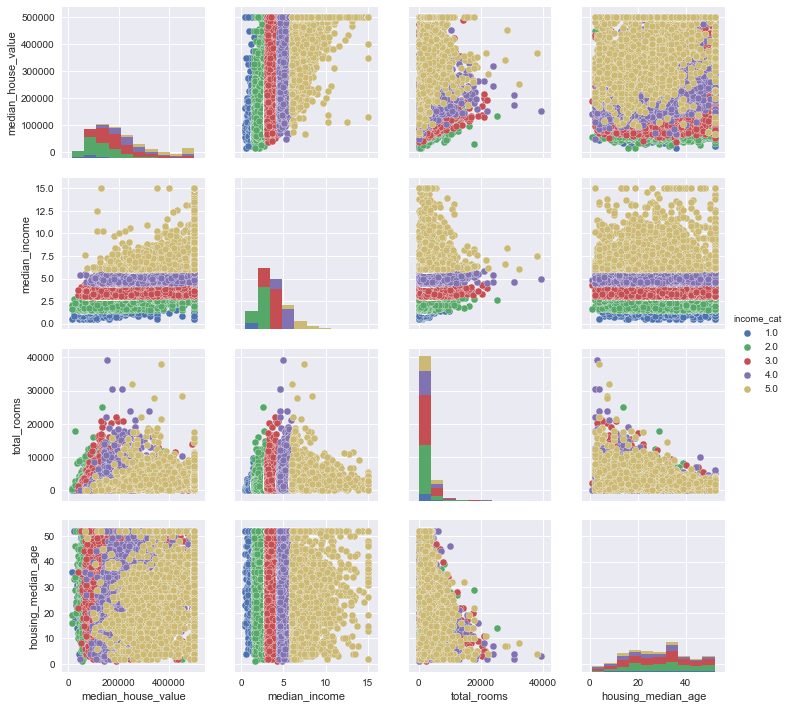

In [21]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
plt.figure(figsize=(12,12))
g = sns.pairplot(housing, hue="income_cat", vars=attributes);

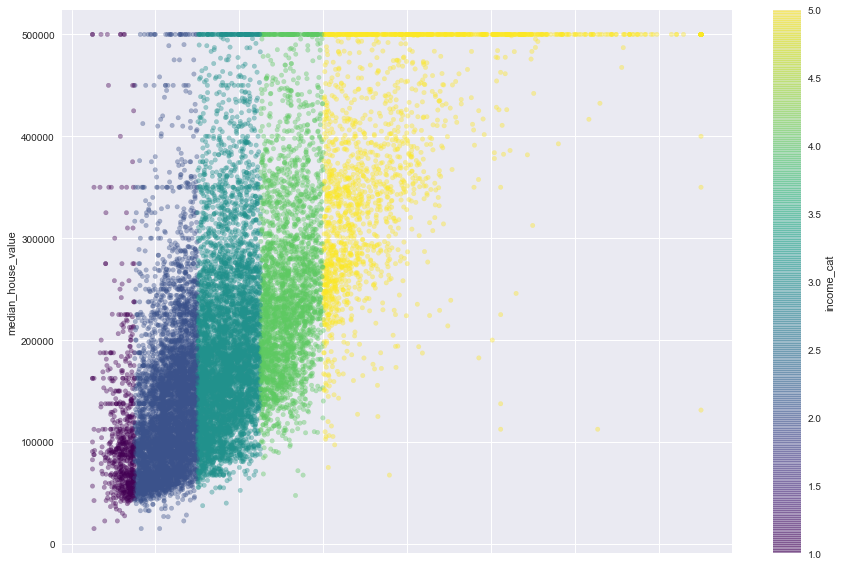

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             c="income_cat", alpha=0.4, figsize=(15,10), cmap=plt.get_cmap("viridis"));

## Creating new attributes

In [23]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"]= housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

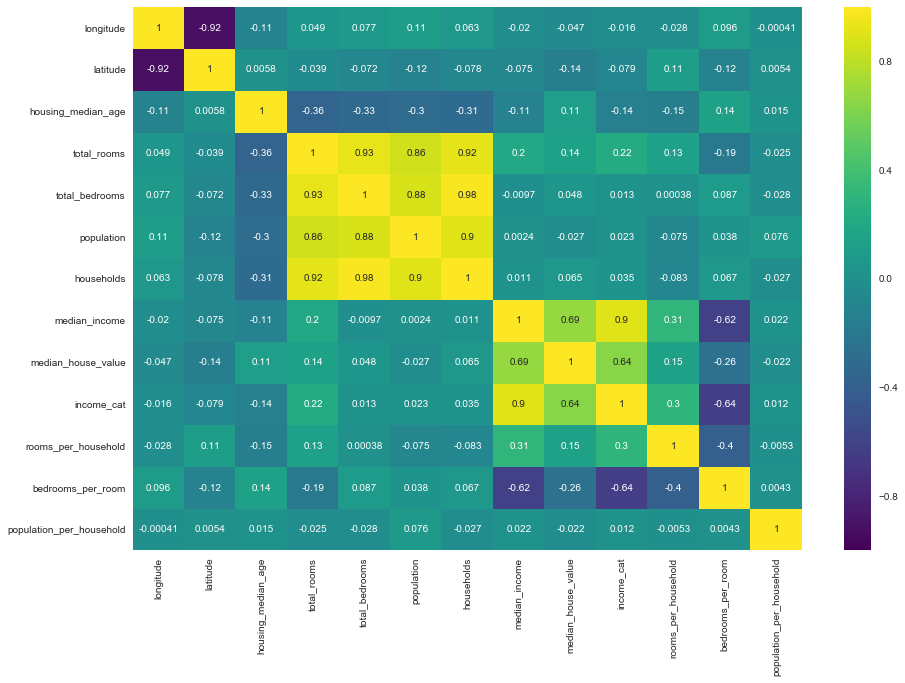

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(), cmap="viridis", annot=True);

In [25]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Preparing the Data for a machine learning Model

In [26]:
housing = train_set2.drop("median_house_value", axis=1)
housing_labels = train_set2["median_house_value"].value_counts()

`total_bedrooms` have missing values. Most Machine Learning Models do no work with missing data, we have three choices when dealing with them:
- Get rid of the corresponding districts (the whole row)
- Get rid of the whole attribute (eliminate the `total_bedrooms` column)
- Set the missing value to some other numerical value (zero, the mean, the median, etc.)

In [27]:
# Number of nan values
housing.total_bedrooms.value_counts(dropna=False).head(1)

NaN    158
Name: total_bedrooms, dtype: int64

In [28]:
# Scikit's way to do it
from sklearn.preprocessing import Imputer

# First specify how you want to fill missing data 
imputer = Imputer(strategy="median")
# create df with numerical values only (no median of categorical... duh!)
housing_num = housing.drop("ocean_proximity", axis=1)
# compute the mean of each of the columns
imputer.fit(housing_num)
# Put back the new replaced values
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)
## Or: imputer.fit_transform(housing_num) to do it in a single line

# No more NANs!
housing_tr.total_bedrooms.value_counts(dropna=False).head(1)

433.0    181
Name: total_bedrooms, dtype: int64

## Handling Text and Categorical Attributes

##### LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [31]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

##### OneHotEncoder

###### (The short way to transform)

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

###### (The long way to transform)

In [44]:
encoder = OneHotEncoder()
encoder.fit(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot = encoder.transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

##### LabelBinarizer

In numerical analysis and computer science, a **sparse matrix or sparse array** is a matrix in which most of the elements are zero.

In [48]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Custom Transformers

In [63]:
# A foreword on "np.c_"
np.c_[[1,2,3], [9,8,7]]

array([[1, 9],
       [2, 8],
       [3, 7]])

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = range(3,7)
class CombinedAttributesAdded(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [70]:
attr_added = CombinedAttributesAdded(add_bedrooms_per_room=False)
housing_extra_attrs = attr_added.fit_transform(housing.values)
pd.DataFrame(housing_extra_attrs).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Transformation Pipelines